In [2]:
#Kakarla Bhanu Prakash
#BL.EN.U4CSE21081

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("CreditCardData.csv")
df.head(3)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0


In [3]:
# Convert Amount into integet
df['Amount'] = df['Amount'].str.replace('£', '').str.replace(',', '').astype(float)

In [4]:
# Covvert Transcation ID into interger
df['Transaction ID'] = df['Transaction ID'].str.replace('#', '').str.replace(' ', '').astype(int)

In [5]:
# Covvert Transcation ID into interger
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d').astype(int)

C:\Users\krp95\AppData\Local\Temp\ipykernel_22172\1000032384.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d').astype(int)


In [6]:
df.head(3)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,20201014,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039221,20201014,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694780,20201014,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0


In [11]:
data = pd.get_dummies(df, columns=["Day of Week", "Type of Card", "Entry Mode", "Type of Transaction",
                                "Merchant Group", "Country of Transaction", "Shipping Address",
                                "Country of Residence", "Bank", "Gender"])
data["target"]=df["Fraud"]

In [12]:
# New  DataSet
data.head(3)

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M,target
0,3577209,20201014,19,5.0,25.2,0,False,False,False,True,...,False,False,False,False,False,False,True,False,True,0
1,3039221,20201014,17,288.0,49.6,0,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
2,2694780,20201014,14,5.0,42.2,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0


In [13]:
data['Age'] = data['Age'].astype(int)
data['Amount'] = data['Amount'].fillna(0).astype('int64')

data.shape

(100000, 54)

In [14]:
data.head()

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M,target
0,3577209,20201014,19,5,25,0,False,False,False,True,...,False,False,False,False,False,False,True,False,True,0
1,3039221,20201014,17,288,49,0,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
2,2694780,20201014,14,5,42,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
3,2640960,20201013,14,28,51,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
4,2771031,20201013,23,91,38,1,False,False,True,False,...,False,False,True,False,False,False,False,False,True,1


In [15]:
np.dot(data["Amount"],data["Age"])

500906750

In [16]:
np.linalg.norm(data["Amount"])

52828.042685679735

In [17]:
data.head()

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M,target
0,3577209,20201014,19,5,25,0,False,False,False,True,...,False,False,False,False,False,False,True,False,True,0
1,3039221,20201014,17,288,49,0,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
2,2694780,20201014,14,5,42,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
3,2640960,20201013,14,28,51,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
4,2771031,20201013,23,91,38,1,False,False,True,False,...,False,False,True,False,False,False,False,False,True,1


In [18]:
grouped=data.groupby("target")
grouped.first()

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M
target,,,,,,,,,,,,,,,,,,,,,
0,3577209,20201014,19,5,25,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2771031,20201013,23,91,38,1,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
class_A_data = data[data['target'] == 0]
class_B_data = data[data['target'] == 1]


In [20]:
import numpy as np

centroid_A = np.mean(class_A_data, axis=0)
centroid_B = np.mean(class_B_data, axis=0)


In [21]:
centroid_A

Transaction ID                           3.116641e+06
Date                                     2.020101e+07
Time                                     1.498613e+01
Amount                                   1.163481e+02
Age                                      4.455304e+01
Fraud                                    0.000000e+00
Day of Week_Friday                       1.400787e-04
Day of Week_Thursday                     1.077528e-04
Day of Week_Tuesday                      4.963526e-01
Day of Week_Wednesday                    5.033996e-01
Type of Card_MasterCard                  4.667098e-01
Type of Card_Visa                        5.332902e-01
Entry Mode_CVC                           3.262755e-01
Entry Mode_PIN                           5.153817e-01
Entry Mode_Tap                           1.583428e-01
Type of Transaction_ATM                  3.405097e-01
Type of Transaction_Online               3.262755e-01
Type of Transaction_POS                  3.332148e-01
Merchant Group_Children     

In [22]:
centroid_B

Transaction ID                           3.123565e+06
Date                                     2.020101e+07
Time                                     9.103405e+00
Amount                                   6.386310e+01
Age                                      4.444225e+01
Fraud                                    1.000000e+00
Day of Week_Friday                       1.389854e-04
Day of Week_Thursday                     2.779708e-04
Day of Week_Tuesday                      5.188325e-01
Day of Week_Wednesday                    4.807505e-01
Type of Card_MasterCard                  3.995830e-01
Type of Card_Visa                        6.004170e-01
Entry Mode_CVC                           4.448923e-01
Entry Mode_PIN                           2.982627e-01
Entry Mode_Tap                           2.568450e-01
Type of Transaction_ATM                  2.325226e-01
Type of Transaction_Online               4.448923e-01
Type of Transaction_POS                  3.225851e-01
Merchant Group_Children     

In [23]:
centroid_A = np.std(class_A_data,axis=0)
centroid_B = np.std(class_B_data,axis=0)

In [24]:
x = np.linalg.norm(centroid_A - centroid_B)
x

415.49467004714865

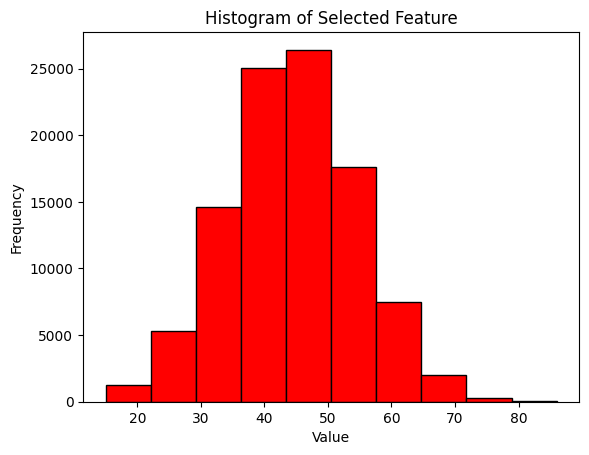

In [40]:

import numpy as np
import matplotlib.pyplot as plt

selected_feature = data['Age']
num_bins =10
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='r', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()


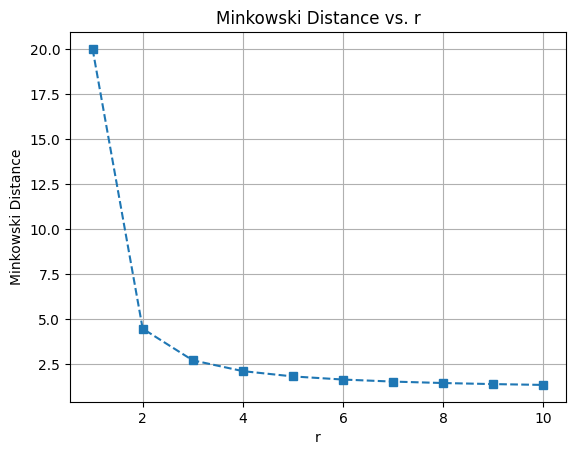

In [41]:
import numpy as np
import matplotlib.pyplot as plt
vector1 = data.iloc[0, :]
vector2 = data.iloc[1, :]
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 ^ vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='s', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
x = data.drop("target",axis=1)
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
y_preds=knn.predict(x_test.values)
y_preds

C:\Users\krp95\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

matrix=confusion_matrix(y_test,y_preds)
report = classification_report(y_test,y_preds)


In [37]:
print(matrix)

[[21592  1561]
 [ 1678   169]]


In [38]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     23153
           1       0.10      0.09      0.09      1847

    accuracy                           0.87     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.87      0.87      0.87     25000

